# Regression Problem Analysis
Arthur: Leon Lai

Before getting started on this kernel, here summarized some great scripts which helped me a lot for learning "Data Science":

1. [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) by **Pedro Marcelino**

2. [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models) by **Alexandru Papiu**

For machine learning beginners, it's an easy way to start with the regression problem.
In this kernel, we'll do some data analysis step by step and build some models for predictions.

Let's start our journey~

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Primary analysis
Use **.head()** to check if the data was loaded correctly.

Use **.info()** to get some summary of dataset with the information about missing data and feature types.

Use **.corr()** to compute pairwise correlation of columns to check some important features related to our target.

We can also draw a diagram by using **seaborn.heatmap()**.

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

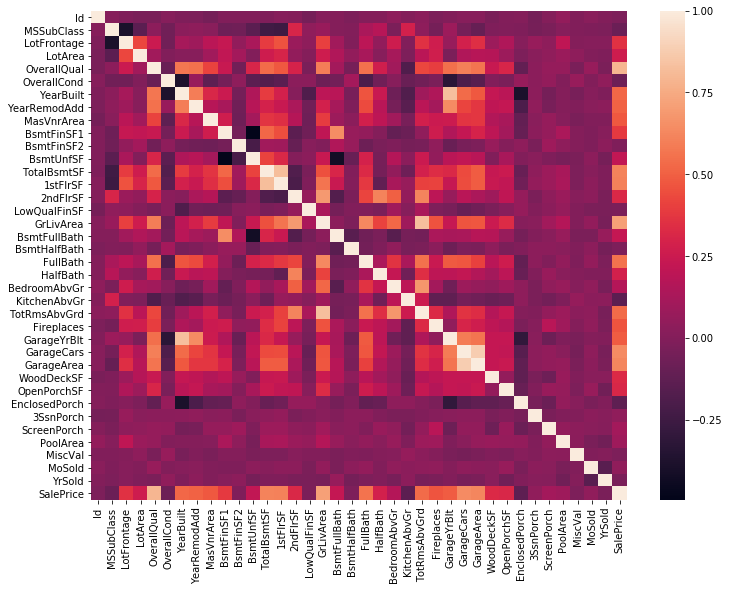

In [7]:
corr = train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr);

In [8]:
corr.nlargest(20,'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

**I also print the data description below.**

In [9]:
with open('data_description.txt') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data Engineering
For solving a regression problem, we may need to do some data analysis below:

1. **Handle missing data**: Delete or fill them based on the analysis.
2. **Check the distribution of dataset**: In Regression analysis, Heteroscedasticity is the major concern. Make the dataset distribution normalized can help improve.
3. **Handle categorical features**: Create dummy variables (one-hot-encoding) for them.
4. **Data scaling**: Make the numeric features have the same scale help the optimization.

### Handle missing data

In [10]:
miss_count = train.isnull().sum()
per = train.isnull().sum() / len(train)
corr = train.corr()['SalePrice']
miss = pd.concat([miss_count,per,corr],axis=1,keys=['miss_count', 'percetage','corr'])
miss.sort_values('miss_count',ascending = False)

,miss_count,percetage,corr
PoolQC,1453,0.995205,NaN
MiscFeature,1406,0.963014,NaN
Alley,1369,0.937671,NaN
Fence,1179,0.807534,NaN
FireplaceQu,690,0.472603,NaN
LotFrontage,259,0.177397,0.351799
GarageFinish,81,0.055479,NaN
GarageQual,81,0.055479,NaN
GarageType,81,0.055479,NaN
GarageYrBlt,81,0.055479,0.486362


For 'PoolQC', 'MiscFeature', 'Alley', 'Fence' and 'FireplaceQu' features, actually, they are not treated as missing values based on the data description, which means the blanks are the 'None'. So I decide to keep them.

'LotFrontage' has more than 15% missing data and has low correlation with our target. I'll delete it.

'Garage..' & 'Bsmt..' features may be covered by some their other numeric features like 'GarageCars' & 'BsmtFinSF1'. I'll try to delete them.

**For the remaining missing data, I'll fill them with the mean value of their respective columns after completing the analysis.**

In [11]:
train.drop(miss[(miss['miss_count'] > 30) & (miss['miss_count'] < 300)].index,axis=1,inplace=True)

Do the same things for test dataset. (No target 'SalePrice' feature in test set so skip the correlation computation.)

In [12]:
miss_count_test = test.isnull().sum()
per_test = test.isnull().sum() / len(test)
miss_test = pd.concat([miss_count_test,per_test],axis=1,keys=['miss_count', 'percetage'])
miss_test.sort_values('miss_count',ascending = False)

,miss_count,percetage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [13]:
test.drop(miss_test[(miss_test['miss_count'] > 30) & (miss_test['miss_count'] < 300)].index,axis=1,inplace=True)

### Check the distribution of dataset

First let's check the target feature 'SalePrice'! 

The histogram shows the distribution. 

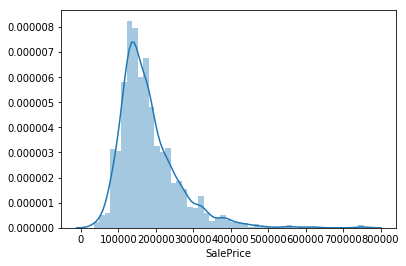

In [14]:
sns.distplot(train['SalePrice']);

We can find that it's not the normal distribution. 
Let's check some important features as well!

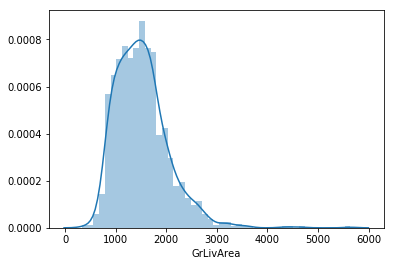

In [15]:
sns.distplot(train['GrLivArea']);

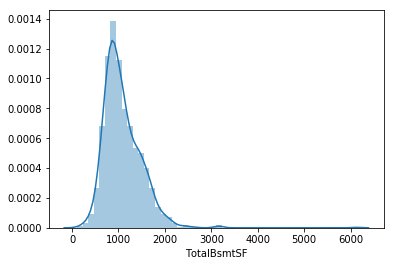

In [16]:
sns.distplot(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF']); #remove the value '0' from diagram for observation

We see the features have positive skewness. 

Let's check the scatter diagram between the feature and target. 

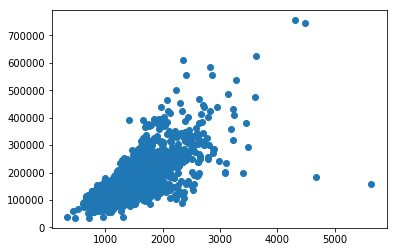

In [17]:
plt.scatter(train['GrLivArea'],train['SalePrice']);

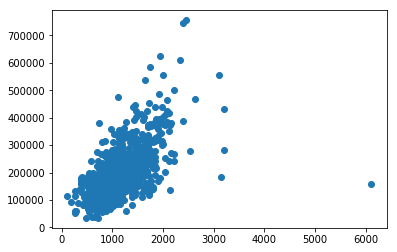

In [18]:
plt.scatter(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'],train[train['TotalBsmtSF'] > 0]['SalePrice']);

We can see the distributiom like a conic shape with heteroscedasticity problem.

The most easy way to make the distribution become normal is to do the '**log-transformation**'. We'll compute the skewness and do the log-transformation for the features with higher skewness (> 0.75).

In [19]:
from scipy.stats import skew

In [20]:
def skew_to_norm(X):
    num_cols = X.columns[X.dtypes != 'object']
    skew_values = X[num_cols].apply(lambda x:skew(x.dropna()))
    skew_cols = skew_values[skew_values > 0.75].index
    X[skew_cols] = np.log1p(X[skew_cols])
    return X

In [21]:
train = skew_to_norm(train)

In [22]:
test = skew_to_norm(test)

Check the distribution after doing the log-transformation.

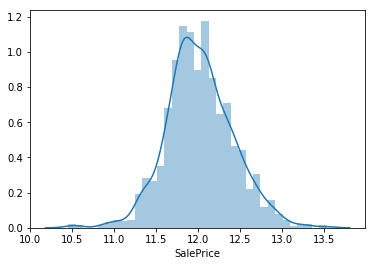

In [23]:
sns.distplot(train['SalePrice']);

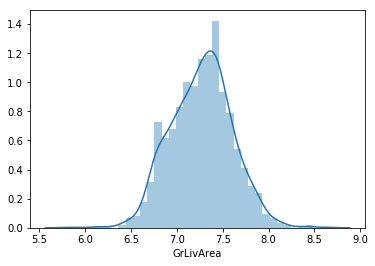

In [24]:
sns.distplot(train['GrLivArea']);

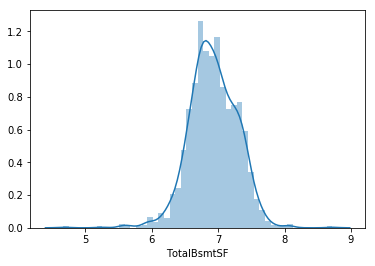

In [25]:
sns.distplot(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF']);

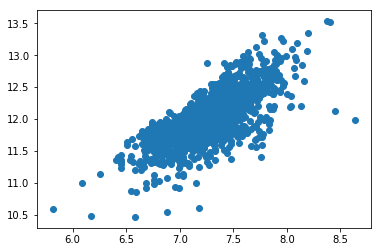

In [26]:
plt.scatter(train['GrLivArea'],train['SalePrice']);

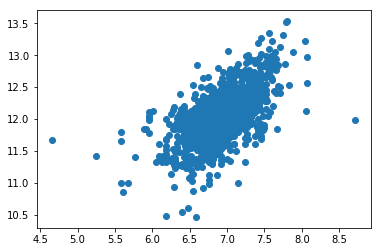

In [27]:
plt.scatter(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'],train[train['TotalBsmtSF'] > 0]['SalePrice']);

The heteroscedasticity problem has been improved!

### Handle categorical features

Combine the train and test dataset for handling.

In [28]:
X_train = train.drop(['Id','SalePrice'],axis=1)
y_train = train['SalePrice']
X_test = test.drop('Id',axis=1)
all_data = pd.concat([X_train,X_test])

In [29]:
all_data_dummy = pd.get_dummies(all_data)

In [30]:
all_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 243 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(25), int64(9), uint8(209)
memory usage: 1.4 MB


**Fill the remaining missing data with the mean value for numeric features in both train and test dataset.**

In [31]:
all_data_final = all_data_dummy.fillna(all_data_dummy.mean())

In [32]:
X_train = all_data_final.iloc[0:X_train.shape[0]]
X_test = all_data_final.iloc[X_train.shape[0]:]

### Data scaling
Do the Standard Scaling (Z-score normalization) for the numeric features.:

$$ \large z= \frac{x-\mu}{\sigma} $$

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler()
num_cols = X_train.columns[X_train.dtypes != 'uint8'] # remove the one-hot encoding features
train_scaled = scale.fit_transform(X_train[num_cols])
test_scaled = scale.transform(X_test[num_cols])

In [35]:
X_train_one_hot = X_train.drop(num_cols,axis=1).values
X_test_one_hot = X_test.drop(num_cols,axis=1).values

In [36]:
X_train = np.hstack([train_scaled,X_train_one_hot])
X_test = np.hstack([test_scaled,X_test_one_hot])

## Define Cost Function

In [37]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring = 'neg_mean_squared_error',cv = 5))
    return rmse

## Build the models
**Ridge** (L2 regression)

In [38]:
from sklearn.linear_model import RidgeCV,LassoCV

In [39]:
model_ridge = RidgeCV(alphas=[0.01,0.03,0.1,0.3,1,3,5,10,15,20,30,50],cv=5).fit(X_train,y_train)

In [40]:
model_ridge.alpha_

15.0

In [41]:
rmse_cv(model_ridge).mean()

0.12653724436939945

The cross validation RMSE mean is 0.1265. Not bad!

Let's try **Lasso** (L1 regression)!

In [42]:
model_lasso = LassoCV(alphas=[0.01,0.03,0.1,0.3,1,3,5,10,15,20,30,50],cv=5).fit(X_train,y_train)

In [43]:
model_lasso.alpha_

0.01

In [44]:
rmse_cv(model_lasso).min()

0.12631804618657413

Seems that Lasso has the similar performance.

Let's try **Xgboost**!

In [45]:
import xgboost as xgb

In [46]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

[10:22:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [47]:
rmse_cv(model_xgb).mean()

[10:22:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:22:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:22:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:22:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:22:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.12325781788063057

Xgboost has better score 0.12326! Good! 

Next we combine the three models to see if we get the better performance.

In [48]:
from sklearn.ensemble import VotingRegressor

In [49]:
model_vr = VotingRegressor([('ri', model_ridge), ('la', model_lasso), ('xg',model_xgb)])

In [50]:
model_vr.fit(X_train,y_train)

[10:22:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('ri',
                             RidgeCV(alphas=array([1.0e-02, 3.0e-02, 1.0e-01, 3.0e-01, 1.0e+00, 3.0e+00, 5.0e+00,
       1.0e+01, 1.5e+01, 2.0e+01, 3.0e+01, 5.0e+01]),
                                     cv=5, fit_intercept=True, gcv_mode=None,
                                     normalize=False, scoring=None,
                                     store_cv_values=False)),
                            ('la',
                             LassoCV(alphas=[0.01, 0.03, 0.1, 0.3, 1, 3, 5, 10,
                                             15, 20, 30, 50],
                                     copy_X=True, cv=5, eps=0.001,
                                     fit_intercept=Tr...
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                          

In [51]:
rmse_cv(model_vr).mean()

[10:22:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:22:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.12276383459643432

Wow! The score is better again!

In the end, let's check the score on test dataset!

## Predict and do the submission

In [105]:
sub = pd.read_csv('sample_submission.csv')

In [106]:
ridge_pred = np.expm1(model_ridge.predict(X_test))
sub['SalePrice'] = ridge_pred
sub.to_csv('ridge.csv',index=False)

Ridge score on test dataset is **0.13044**

In [107]:
lasso_pred = np.expm1(model_lasso.predict(X_test))
sub['SalePrice'] = lasso_pred
sub.to_csv('lasso.csv',index=False)

Lasso score on test dataset is **0.14222**

In [108]:
xgb_pred = np.expm1(model_xgb.predict(X_test))
sub['SalePrice'] = xgb_pred
sub.to_csv('xgb.csv',index=False)

XGboost score on test dataset is **0.13192**

In [205]:
vr_pred = np.expm1(model_vr.predict(X_test))
sub['SalePrice'] = vr_pred
sub.to_csv('vr.csv',index=False)

Conbine the three models with the final score **0.12623**!